# TOC
[0. Import and Load data](#0.-Import-and-Load-data)  
[1. data 자체에 오류가 없는지 확인](#1.-data-자체에-오류가-없는지-확인)  
[2. 중복 data 확인](#2.-중복-data-확인)  
[3. 길이 시각화](#3.-길이-시각화)  
[4. 토크나이저 거친 이후 그래프 살펴보기 (question)](#4.-토크나이저-거친-이후-그래프-살펴보기-(question))  
[5. Query문 살펴보기](#5.-Query문-살펴보기)

---

# 0. Import and Load data

In [1]:
from datasets import load_from_disk, load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
mrc_datasets = load_from_disk('./data/train_dataset/')
mrc_train_dataset = mrc_datasets['train']
mrc_valid_dataset = mrc_datasets['validation']

In [240]:
# data 1개만 확인해보기
mrc_valid_dataset[3]

{'title': '백조 기사',
 'context': '프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용의 전설적인 선조로 백조 기사를 등장시킨다. 고드프루아는 중세 기독교 세계에서 전설적인 인물이 되었고 그의 신화적 혈통은 중세 작가들의 인기있는 주제였다.\\n\\n《백조 기사의 탄생》(La Naissance du Chevalier au Cygne)은 백조 아이 이야기를 십자군 무훈시에 도입한 첫번째 작품이다. 텍스트는 백조 기사 어머니의 이름에 따라 1) 엘리옥스, 2) 베아트릭스, 3) 엘리옥스와 베아트릭스의 혼합, 4) 이솜베르테의 네 가지 버전으로 분류 할 수 있다. 이 가운데 이솜브레테 계열의 이야기는 프랑스어 버전에는 없고 스페인의 《첫 해외 정복》(Gran conquista de Ultramar )에만 등장한다. (가스통 파리는 그가 버전 I로 부른 십자군과 구분된 백조-아이 이야기 원형도 비슷하게 분류하였다.)\\n\\n엘리옥스는 돌로파토스 이야기에 가장 가까운 버전이지만 길을 잃은 젊은 영주를 헝가리 너머의 동방의 통치자인 로타이르 왕으로, 처녀를 엘리옥스로 바꾸어 이야기를 보다 궁정식으로 바꾸었다. 로타이르는 길을 잃고 샘 옆에 멈추어 잠들고, 그 사이 산으로 나무를 하러 온 엘리옥스가 등장한다. 한눈에 반한 로타이르는 어머니의 반대를 무릅쓰고 그녀와 결혼하고, 엘리옥스는 자신이 일곱 아이를 낳고 죽을 것이며 그 아이들 가운데 한 명이 동방의 왕이 될 것이라 예언한다.\\n\\n로타이르가 전쟁에 나간 사이 엘리옥스는 일곱 아이를 낳는다. 시어머니 마트로시유는 엘리옥스를 죽이고 하인에게 아이들을 바구니 둘에 담아 숲에 버리라고 명령하고, 로타이르에게는 엘리옥스가 뱀을 낳고서 물려 죽었다고 거짓말을 한다. 그러나 하인은 은둔자의 오두막 옆에 아이들을 놓아두었고, 아이들은 살아 남아 있다가 7년 후 루데마르라는 탐욕스러운 시종에게 발견된다. 보고를 받은 대비는 아이들의 사슬을 빼앗아 없애라고 명령하지만 탐욕에 

## dataframe 생성

In [4]:
# list에 있는 문자 길이 구하기 -> list길이가 모두 1이라 안쓰게 됨
'''
def answer_len_f(answers):
    answer_len_list = []
    for answer in answers:
        answer_len_list.append(len(answer))
    return answer_len_list
'''

'\ndef answer_len_f(answers):\n    answer_len_list = []\n    for answer in answers:\n        answer_len_list.append(len(answer))\n    return answer_len_list\n'

In [5]:
# train data
_id = []  # 중복 확인용
doc_id = []
title = []
context = []
question = []
answer = []
answer_start = []
answer_len = []
question_len = []
context_len = []

for train_data in mrc_train_dataset:
    _id.append(train_data['id'])
    doc_id.append(train_data['document_id'])
    title.append(train_data['title'])
    context.append(train_data['context'])
    question.append(train_data['question'])
    answer.append(train_data['answers']['text'][0])
    context_len.append(len(train_data['context']))
    question_len.append(len(train_data['question']))
    #answer_len.append(answer_len_f(train_data['answers']['text']))
    answer_len.append(len(train_data['answers']['text'][0]))
    answer_start.append(train_data['answers']['answer_start'][0])
    
train_dict = {
    "id":_id,
    "doc_id":doc_id,
    "title":title,
    "context":context,
    "question":question,
    "answer":answer,
    "context_len":context_len,
    "question_len":question_len,
    "answer_len":answer_len,
    "answer_start":answer_start,
}

train_df = pd.DataFrame(train_dict)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3952 non-null   object
 1   doc_id        3952 non-null   int64 
 2   title         3952 non-null   object
 3   context       3952 non-null   object
 4   question      3952 non-null   object
 5   answer        3952 non-null   object
 6   context_len   3952 non-null   int64 
 7   question_len  3952 non-null   int64 
 8   answer_len    3952 non-null   int64 
 9   answer_start  3952 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 308.9+ KB


In [7]:
train_df.head(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start
0,mrc-1-000067,18293,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,하원,862,32,2,235
1,mrc-0-004397,51638,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,《경영의 실제》,621,22,8,212
2,mrc-1-000362,5028,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,백성,850,30,2,510


In [8]:
# valid data
_id = []  # 중복 확인용
doc_id = []
title = []
context = []
question = []
answer = []
answer_start = []
answer_len = []
question_len = []
context_len = []

for valid_data in mrc_valid_dataset:
    _id.append(valid_data['id'])
    doc_id.append(valid_data['document_id'])
    title.append(valid_data['title'])
    context.append(valid_data['context'])
    question.append(valid_data['question'])
    answer.append(valid_data['answers']['text'][0])
    context_len.append(len(valid_data['context']))
    question_len.append(len(valid_data['question']))
    #answer_len.append(answer_len_f(valid_data['answers']['text']))
    answer_len.append(len(valid_data['answers']['text'][0]))
    answer_start.append(valid_data['answers']['answer_start'][0])
    
valid_dict = {
    "id":_id,
    "doc_id":doc_id,
    "title":title,
    "context":context,
    "question":question,
    "answer":answer,
    "context_len":context_len,
    "question_len":question_len,
    "answer_len":answer_len,
    "answer_start":answer_start,
}

valid_df = pd.DataFrame(valid_dict)

In [9]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            240 non-null    object
 1   doc_id        240 non-null    int64 
 2   title         240 non-null    object
 3   context       240 non-null    object
 4   question      240 non-null    object
 5   answer        240 non-null    object
 6   context_len   240 non-null    int64 
 7   question_len  240 non-null    int64 
 8   answer_len    240 non-null    int64 
 9   answer_start  240 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 18.9+ KB


In [10]:
valid_df.head(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start
0,mrc-0-003264,9027,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,한보철강,625,30,4,284
1,mrc-0-004762,51765,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,1871년,964,36,5,146
2,mrc-1-001810,15694,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,나뭇잎,611,31,3,517


In [11]:
all_df = pd.concat([train_df,valid_df], ignore_index=True)
all_df.tail(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start
4189,mrc-0-003083,5326,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,미나미 지로,1314,27,6,247
4190,mrc-0-002978,48575,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,"200,000명",998,35,8,563
4191,mrc-1-000622,5761,레닌주의,사회주의 혁명은 오로지 선진노동자계급에 기초한 계급투쟁으로서 이루어질 수 있다고 주...,마르크스주의자들의 사상은?,공산주의,967,14,4,811


---
# 1. data 자체에 오류가 없는지 확인

## 1) answer, answer start 길이 확인
- 강의에서 train에는 answer가 1개씩이지만 valid나 test에서는 answer or start index가 2개 이상 있을 수 있다고 하여 확인
- `answer_len`은 내가 만든 데이터라 확인할 필요 X(원본 데이터만 확인하면 됨)

```python
# train data
for i in range(len(train_df)):
    if len(train_df['answer'][i])==1:
        pass
    else:
        print(i,'----')
        
    if len(train_df['answer_start'][i])==1:
        pass
    else:
        print(i,'----')
        
# valid data
for i in range(len(valid_df)):
    if len(valid_df['answer'][i])==1:
        pass
    else:
        print(i,'----')
        
    if len(valid_df['answer_start'][i])==1:
        pass
    else:
        print(i,'----')
```

- 확인 결과 모두 1개이다. -> train,valid df의 `answer`, `answer_len`, `answer_start`를 모두 int 형태로 바꿔도 될 것 같다. 
### <span style='color:blue'>-->변경완료</span>

## 2) context에 answer가 존재하는가?

In [12]:
for i in range(len(all_df)):
    if all_df['answer'][i] in all_df['context'][i]:
        pass
    else:
        print(i,'-------')


- 모두 존재한다.

## 3) context에서 answer start 지점이 잘 표시되었는가?

In [13]:
for i in range(len(all_df)):
    answer_start = all_df['answer_start'][i]
    answer_end = answer_start + all_df['answer_len'][i]
    find_se = all_df['context'][i][answer_start:answer_end] # start, end index로 자른 정답
    if find_se == all_df['answer'][i]:
        pass
    else:
        print(find_se, all_df['answer'][i], i)
        

- 모두 잘 표시되었다.

## 4) doc id가 같은 것끼리 context도 같은가?

In [14]:
doc_context_df = all_df[['doc_id','context']]
doc_context_df

,doc_id,context
0,18293,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...
1,51638,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...
2,5028,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...
3,34146,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든..."
4,47334,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...
...,...,...
4187,53265,"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받..."
4188,12190,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...
4189,5326,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...
4190,48575,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...


In [15]:
print(len(doc_context_df[doc_context_df.duplicated(['doc_id'],keep=False)]))
print(len(doc_context_df[doc_context_df.duplicated(['context'],keep=False)]))
print(len(doc_context_df[doc_context_df.duplicated(['doc_id','context'],keep=False)]))

1336
1336
1336


같다.

---
# 2. 중복 data 확인

In [16]:
check_list = ['id', 'title', 'context', 'question']

In [17]:
print('in train ------ ')
for check in check_list:
    print(f'중복 원본까지 - {check}: {len(train_df[train_df.duplicated(check,keep=False)])}')
    print(f'중복되는 것만 - {check}: {len(train_df[train_df.duplicated(check)])}')
    
print('\n\nin valid ------ ')
for check in check_list:
    print(f'중복 원본까지 - {check}: {len(valid_df[valid_df.duplicated(check,keep=False)])}')
    print(f'중복되는 것만 - {check}: {len(valid_df[valid_df.duplicated(check)])}')
    
print('\n\nin all data ------ ')
for check in check_list:
    print(f'중복 원본까지 - {check}: {len(all_df[all_df.duplicated(check,keep=False)])}')
    print(f'중복되는 것만 - {check}: {len(all_df[all_df.duplicated(check)])}')

in train ------ 
중복 원본까지 - id: 0
중복되는 것만 - id: 0
중복 원본까지 - title: 1944
중복되는 것만 - title: 1236
중복 원본까지 - context: 1191
중복되는 것만 - context: 612
중복 원본까지 - question: 0
중복되는 것만 - question: 0


in valid ------ 
중복 원본까지 - id: 0
중복되는 것만 - id: 0
중복 원본까지 - title: 24
중복되는 것만 - title: 12
중복 원본까지 - context: 10
중복되는 것만 - context: 5
중복 원본까지 - question: 0
중복되는 것만 - question: 0


in all data ------ 
중복 원본까지 - id: 0
중복되는 것만 - id: 0
중복 원본까지 - title: 2152
중복되는 것만 - title: 1368
중복 원본까지 - context: 1336
중복되는 것만 - context: 688
중복 원본까지 - question: 0
중복되는 것만 - question: 0


- duplicated 함수는 `a` `a` `a` -> `false` `true` `true` 를 반환한다. **(2)** 원본을 제외하고 중복의 개수를 세는 것!
- **train에 context 중복이 굉장히 많음**을 확인 가능. valid에는 5개밖에 없음
- 같은 context 다른 질문인 것을 모두 train에 넣기에는 valid로 구성하지 못하는 data의 비중이 너무 많은 것 같다.1336/4192
- train+val을 하니 71개가 더 추가됨 - train, val간에도 중복되는 문장 존재

# 3. 길이 시각화

In [18]:
# 길이 비교를 위해 train, valid, all df 합치기
train_df['doc_type']='train'
valid_df['doc_type']='valid'
all_df['doc_type']='all'
concat3_df = pd.concat([train_df,valid_df,all_df], ignore_index=True)
concat3_df.tail(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start,doc_type
8381,mrc-0-003083,5326,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,미나미 지로,1314,27,6,247,all
8382,mrc-0-002978,48575,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,"200,000명",998,35,8,563,all
8383,mrc-1-000622,5761,레닌주의,사회주의 혁명은 오로지 선진노동자계급에 기초한 계급투쟁으로서 이루어질 수 있다고 주...,마르크스주의자들의 사상은?,공산주의,967,14,4,811,all


In [19]:
def violinbox_len(type_len):
    print('train data-----------------------------')
    print('최댓값: ',train_df.describe()[type_len]['max'])
    print('최솟값: ',train_df.describe()[type_len]['min'])
    print('평균: ',train_df.describe()[type_len]['mean'])
    print('\nvalid data-----------------------------')
    print('최댓값: ',valid_df.describe()[type_len]['max'])
    print('최솟값: ',valid_df.describe()[type_len]['min'])
    print('평균: ',valid_df.describe()[type_len]['mean'])
    print('\nall data(train+valid)------------------')
    print('최댓값: ',all_df.describe()[type_len]['max'])
    print('최솟값: ',all_df.describe()[type_len]['min'])
    print('평균: ',all_df.describe()[type_len]['mean'])
    print('\n\n')
    fig, ax = plt.subplots(figsize=(16,9),nrows=2)
    ax=sns.boxplot(data=concat3_df, x=type_len,y="doc_type",
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"},
                palette='Set2',
                ax=ax[0])

    ax.set(xlabel=None) # 위에 있는 plot xlabel 삭제

    ax=sns.violinplot(data=concat3_df, x=type_len,y="doc_type",palette='Set2');
    plt.show()


## 1) Context

train data-----------------------------
최댓값:  2059.0
최솟값:  512.0
평균:  920.2206477732793

valid data-----------------------------
최댓값:  2064.0
최솟값:  517.0
평균:  916.725

all data(train+valid)------------------
최댓값:  2064.0
최솟값:  512.0
평균:  920.0205152671756





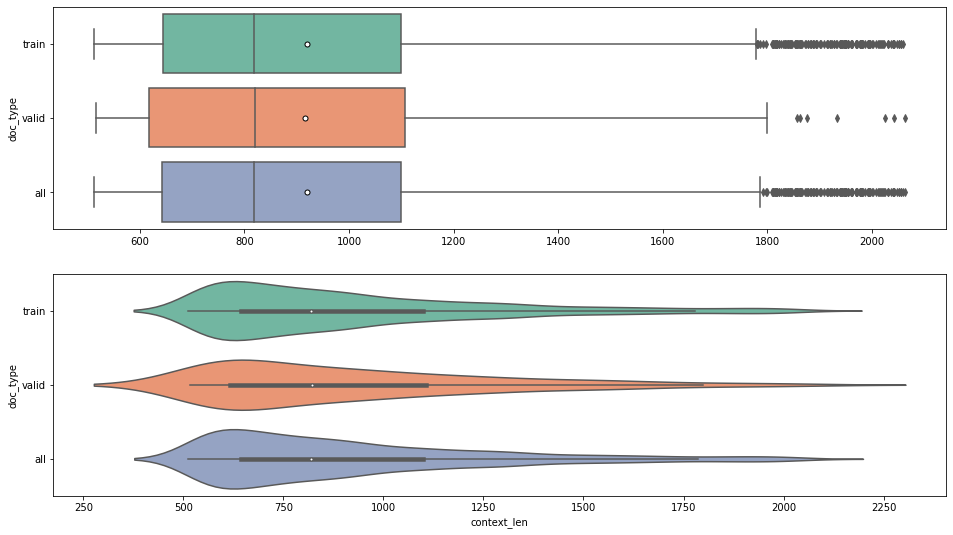

In [20]:
violinbox_len('context_len')

## 2) Question

train data-----------------------------
최댓값:  78.0
최솟값:  8.0
평균:  29.32236842105263

valid data-----------------------------
최댓값:  59.0
최솟값:  9.0
평균:  29.195833333333333

all data(train+valid)------------------
최댓값:  78.0
최솟값:  8.0
평균:  29.315124045801525





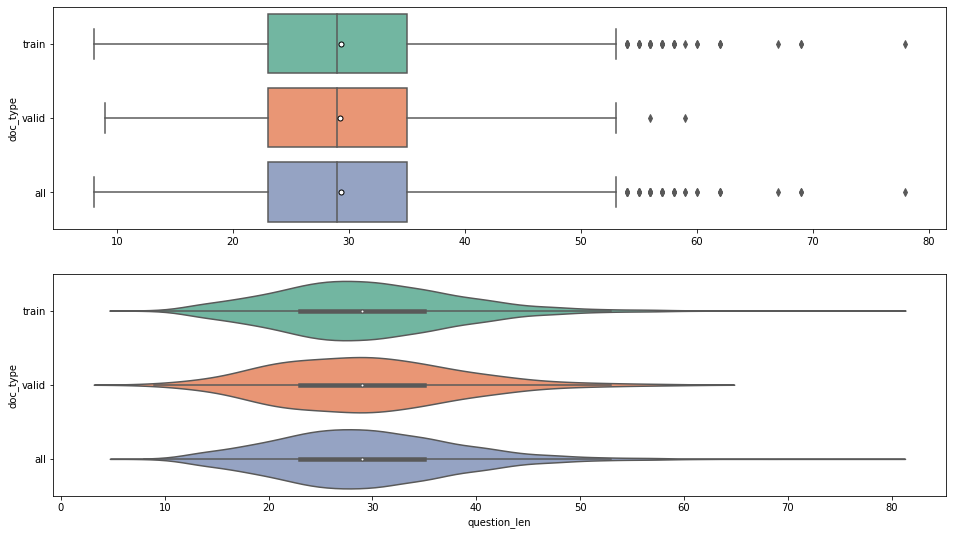

In [21]:
violinbox_len('question_len')

## 3) Answer

train data-----------------------------
최댓값:  83.0
최솟값:  1.0
평균:  6.275050607287449

valid data-----------------------------
최댓값:  64.0
최솟값:  1.0
평균:  6.9125

all data(train+valid)------------------
최댓값:  83.0
최솟값:  1.0
평균:  6.311545801526718





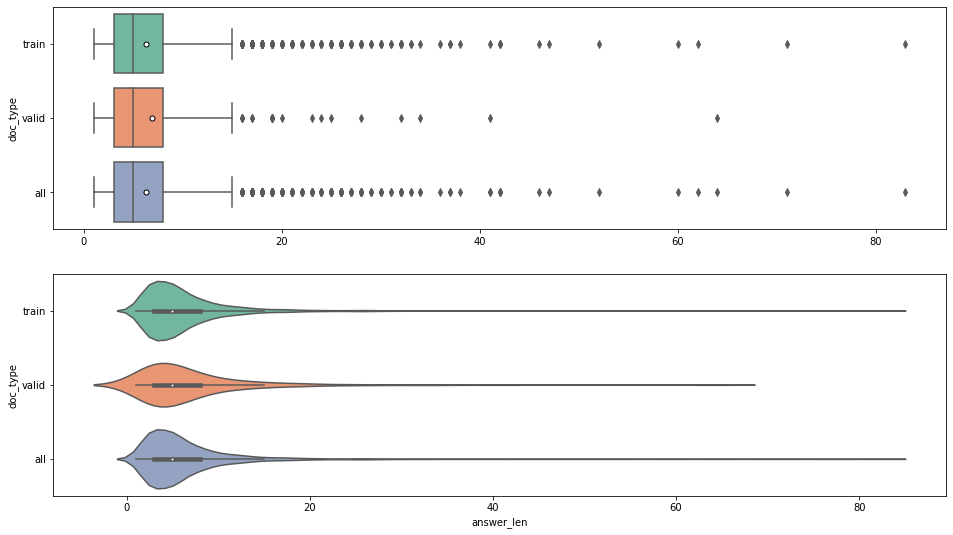

In [22]:
violinbox_len('answer_len')

# 4. 토크나이저 거친 이후 그래프 살펴보기 (question)

In [23]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

## 1) 토크나이저 분포 count

In [24]:
token_train_dict = {}
for i in tqdm(range(len(train_df))):
    text = train_df['question'][i]
    tokenized_text = tokenizer.tokenize(text)
    for tt in tokenized_text:
        try:
            token_train_dict[tt]+=1
        except:
            token_train_dict[tt] = 1
            
token_train_df = pd.DataFrame(list(token_train_dict.items()), columns=['token','count'])
token_train_df = token_train_df.sort_values('count',ascending=False)
token_train_df = token_train_df.reset_index(drop=True)

100%|██████████| 3952/3952 [00:00<00:00, 6603.12it/s]


In [25]:
token_valid_dict = {}
for i in tqdm(range(len(valid_df))):
    text = valid_df['question'][i]
    tokenized_text = tokenizer.tokenize(text)
    for tt in tokenized_text:
        try:
            token_valid_dict[tt]+=1
        except:
            token_valid_dict[tt] = 1
            
token_valid_df = pd.DataFrame(list(token_valid_dict.items()), columns=['token','count'])
token_valid_df = token_valid_df.sort_values('count',ascending=False)
token_valid_df = token_valid_df.reset_index(drop=True)

100%|██████████| 240/240 [00:00<00:00, 6572.08it/s]


In [26]:
token_all_dict = {}
for i in tqdm(range(len(all_df))):
    text = all_df['question'][i]
    tokenized_text = tokenizer.tokenize(text)
    for tt in tokenized_text:
        try:
            token_all_dict[tt]+=1
        except:
            token_all_dict[tt] = 1
            
token_all_df = pd.DataFrame(list(token_all_dict.items()), columns=['token','count'])
token_all_df = token_all_df.sort_values('count',ascending=False)
token_all_df = token_all_df.reset_index(drop=True)

100%|██████████| 4192/4192 [00:00<00:00, 6679.86it/s]


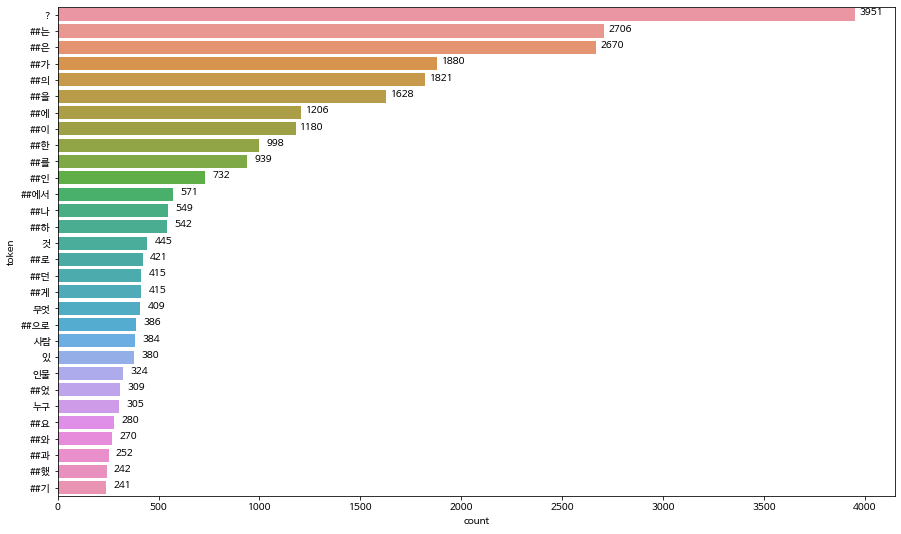

In [201]:
plt.rc('font', family='NanumBarunGothic')
fig = plt.subplots(figsize=(15,9))
ax=sns.barplot(y = token_train_df['token'][:30], x=token_train_df['count'][:30]);

for rect in ax.patches:
    ax.text (rect.get_width()+80,rect.get_y() + rect.get_height()/2,int(rect.get_width()),horizontalalignment='center', fontsize = 10)

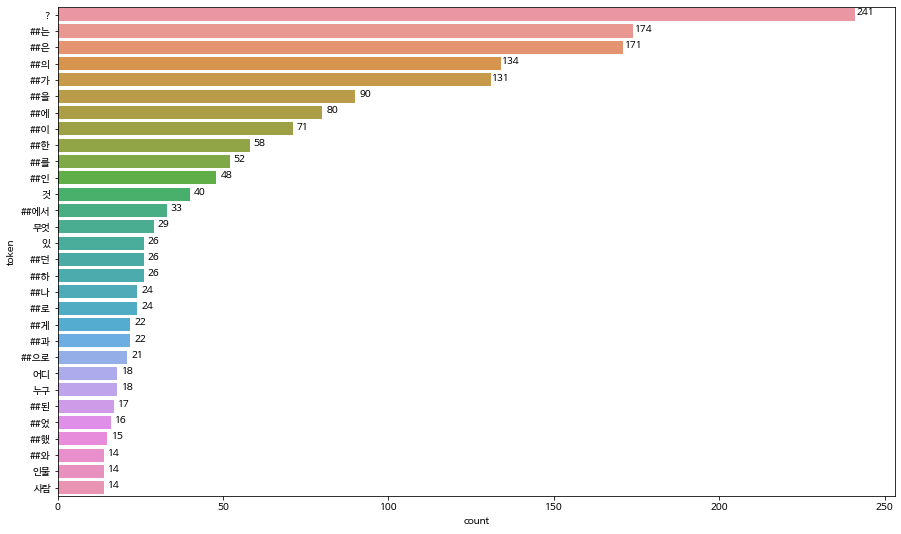

In [65]:
fig = plt.subplots(figsize=(15,9))
ax=sns.barplot(y = token_valid_df['token'][:30], x=token_valid_df['count'][:30]);

for rect in ax.patches:
    ax.text (rect.get_width()+3,rect.get_y() + rect.get_height()/2,int(rect.get_width()),horizontalalignment='center', fontsize = 10)

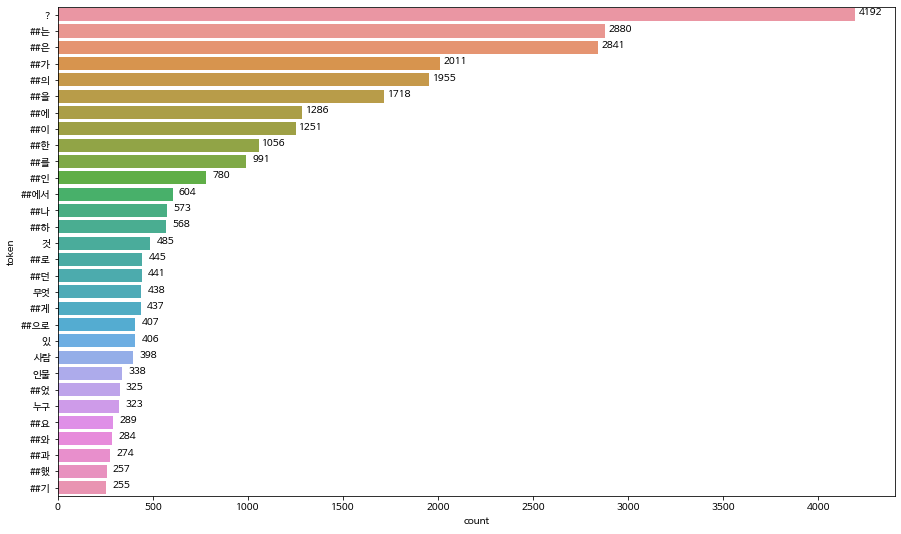

In [67]:
fig = plt.subplots(figsize=(15,9))
ax=sns.barplot(y = token_all_df['token'][:30], x=token_all_df['count'][:30]);

for rect in ax.patches:
    ax.text (rect.get_width()+80,rect.get_y() + rect.get_height()/2,int(rect.get_width()),horizontalalignment='center', fontsize = 10)

- 전체 문서를 보는 것은 의미가 있는지는 모르겠다..! 너무 잘게 쪼개지는건가 싶음 --> Okt로? 일단 pass
- 전체적으로 조사가 굉장히 많아서 조사 관련된 작업은 해보는것도 좋을듯 학습시킬때나 마지막에 voting할때나..
- '무엇' '사람' '인물' '누구' 와 같은 단어가 많이 나오는걸로 봐서 '무엇인가' 또는 '인물은/사람은 누구인가' 가 많이 나올 것으로 예상됨.

## 2) 문장별 토크나이저 개수 분포 확인

In [83]:
token_question_df = concat3_df[['question','doc_type']]
token_question_len = []
for i in tqdm(range(len(token_question_df))):
    text = token_question_df['question'][i]
    tokenized_text = tokenizer.tokenize(text)
    token_question_len.append(len(tokenized_text))

token_question_df['token_question_len'] = token_question_len

100%|██████████| 8384/8384 [00:01<00:00, 7285.29it/s]


train data-----------------------------
최댓값:  43.0
최솟값:  5.0
평균:  16.29832995951417

valid data-----------------------------
최댓값:  32.0
최솟값:  5.0
평균:  16.316666666666666

all data(train+valid)------------------
최댓값:  43.0
최솟값:  5.0
평균:  16.299379770992367





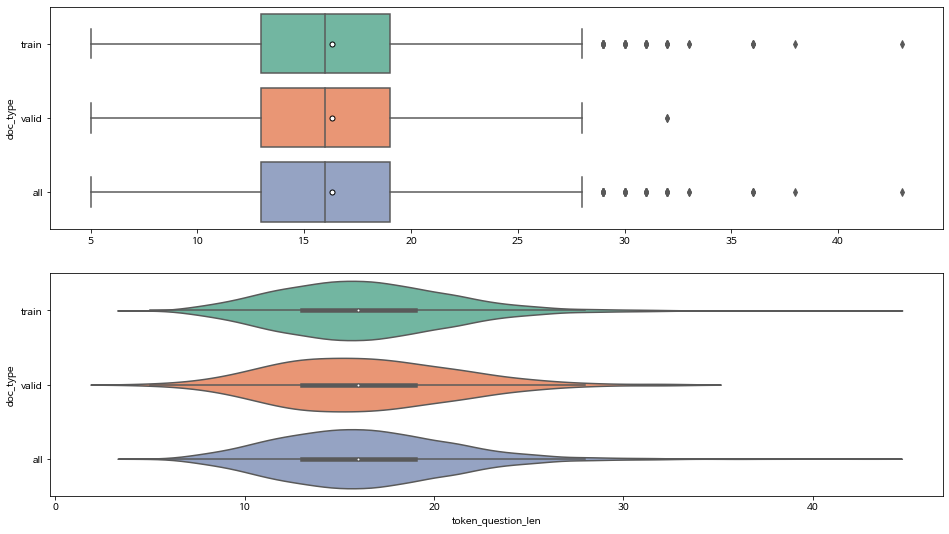

In [198]:
print('train data-----------------------------')
print('최댓값: ',token_question_df[token_question_df['doc_type']=='train'].describe()['token_question_len']['max'])
print('최솟값: ',token_question_df[token_question_df['doc_type']=='train'].describe()['token_question_len']['min'])
print('평균: ',token_question_df[token_question_df['doc_type']=='train'].describe()['token_question_len']['mean'])
print('\nvalid data-----------------------------')
print('최댓값: ',token_question_df[token_question_df['doc_type']=='valid'].describe()['token_question_len']['max'])
print('최솟값: ',token_question_df[token_question_df['doc_type']=='valid'].describe()['token_question_len']['min'])
print('평균: ',token_question_df[token_question_df['doc_type']=='valid'].describe()['token_question_len']['mean'])
print('\nall data(train+valid)------------------')
print('최댓값: ',token_question_df[token_question_df['doc_type']=='all'].describe()['token_question_len']['max'])
print('최솟값: ',token_question_df[token_question_df['doc_type']=='all'].describe()['token_question_len']['min'])
print('평균: ',token_question_df[token_question_df['doc_type']=='all'].describe()['token_question_len']['mean'])
print('\n\n')
                               
fig, ax = plt.subplots(figsize=(16,9),nrows=2)
ax=sns.boxplot(data=token_question_df, x='token_question_len',y="doc_type",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            palette='Set2',
            ax=ax[0])

ax.set(xlabel=None) # 위에 있는 plot xlabel 삭제

ax=sns.violinplot(data=token_question_df, x='token_question_len',y="doc_type",palette='Set2');
plt.show()


# 5. Query문 살펴보기

In [97]:
query_train_dict = {}
for i in tqdm(range(len(train_df))):
    text = train_df['question'][i]
    split_text = text.split()[-1]
    try:
        query_train_dict[split_text]+=1
    except:
        query_train_dict[split_text] = 1
            
query_train_df = pd.DataFrame(list(query_train_dict.items()), columns=['query','count'])
query_train_df = query_train_df.sort_values('count',ascending=False)
query_train_df = query_train_df.reset_index(drop=True)

100%|██████████| 3952/3952 [00:00<00:00, 132765.37it/s]


In [99]:
query_valid_dict = {}
for i in tqdm(range(len(valid_df))):
    text = valid_df['question'][i]
    split_text = text.split()[-1]
    try:
        query_valid_dict[split_text]+=1
    except:
        query_valid_dict[split_text] = 1
            
query_valid_df = pd.DataFrame(list(query_valid_dict.items()), columns=['query','count'])
query_valid_df = query_valid_df.sort_values('count',ascending=False)
query_valid_df = query_valid_df.reset_index(drop=True)

100%|██████████| 240/240 [00:00<00:00, 114117.78it/s]


In [100]:
query_all_dict = {}
for i in tqdm(range(len(all_df))):
    text = all_df['question'][i]
    split_text = text.split()[-1]
    try:
        query_all_dict[split_text]+=1
    except:
        query_all_dict[split_text] = 1
            
query_all_df = pd.DataFrame(list(query_all_dict.items()), columns=['query','count'])
query_all_df = query_all_df.sort_values('count',ascending=False)
query_all_df = query_all_df.reset_index(drop=True)

100%|██████████| 4192/4192 [00:00<00:00, 134740.23it/s]


In [103]:
query_all_df

,query,count
0,사람은?,233
1,인물은?,216
2,것은?,205
3,무엇인가?,136
4,누구인가?,134
...,...,...
1229,담았나?,1
1230,표현되었나?,1
1231,결정자는?,1
1232,회담은?,1


In [238]:
def make_query_group(list_name,i,list_str):
    if check_query in list_name:
        query_check.remove(check_query)
        try:
            query_set[list_str] += query_all_df['count'][i]
        except:
            query_set[list_str] = query_all_df['count'][i]
            
query_set = {}
query_check = list(query_all_df['query']) # list로 해야지 순서가 안바뀜..
person = ['사람은?','인물은?','누구인가?','이름은?','누구인가요?','선수는?','자는?','누구였나?','누구였나요?','누구였는가?','상대는?','명칭은?']
place = ['곳은?','어디인가?','장소는?','국가는?','나라는?','도시는?','지역은?','어디인가요?']
date = ['해는?','시기는?','언제인가?','연도는?','년도는?','날짜는?','날은?','언제인가요?','기간은?','년인가?','몇년도인가?','년도인가?','년도였나요?','때는?']
what = ['것은?','무엇인가?','무엇인가요?','무엇이었나요?']
group = ['기관은?','집단은?','단체는?','팀은']
why = ['이유는?','때문인가?']


for i in range(len(query_all_df)):
    check_query = query_all_df['query'][i]
    make_query_group(person,i,'person')
    make_query_group(place,i,'place')
    make_query_group(date,i,'date')
    make_query_group(what,i,'what')
    make_query_group(group,i,'group')
    make_query_group(why,i,'why')
            
        

query_group_df = pd.DataFrame(list(query_set.items()), columns=['query_group','count'])

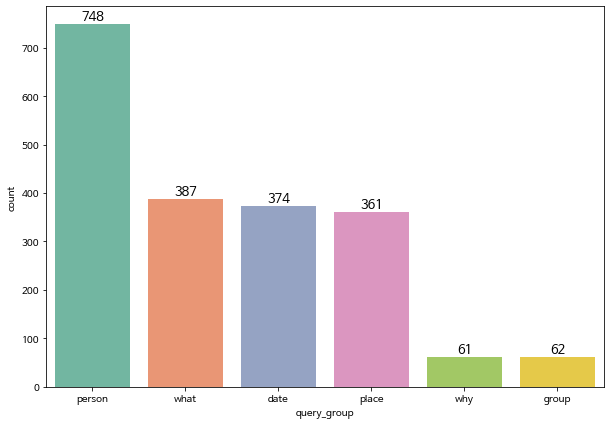

In [239]:
fig = plt.subplots(figsize=(10,7))
ax = sns.barplot(x=query_group_df['query_group'],y=query_group_df['count'],palette = 'Set2');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 8,int(rect.get_height()),horizontalalignment='center', fontsize = 13)

query_check